### Project Name: Salary Predictions of Data Professions

### Mission Overview
The aim of this project is to develop a predictive model for the salaries of data professionals by utilizing machine learning techniques. This involves performing exploratory data analysis (EDA), feature engineering, data preprocessing, model training, evaluation, and deployment. Let's break down the tasks and plan our approach:

### Dataset Columns
- **FIRST NAME**: First name of the professional
- **LAST NAME**: Last name of the professional
- **SEX**: Gender of the professional
- **DOJ**: Date of joining the company
- **CURRENT DATE**: Current date of data
- **DESIGNATION**: Job role/designation
- **AGE**: Age of the professional
- **SALARY**: Salary (target variable)
- **UNIT**: Business unit or department
- **LEAVES USED**: Number of leaves used
- **LEAVES REMAINING**: Number of leaves remaining
- **RATINGS**: Performance ratings
- **PAST EXP**: Past work experience
### Project Steps

#### 1. Exploratory Data Analysis (EDA)
- **Data Summary**: Describe the dataset, including the number of entries and features, data types, and any initial observations.
- **Data Cleaning**: Handle missing or inconsistent data.
- **Visualization**: Use plots (e.g., histograms, box plots, scatter plots) to visualize distributions and relationships among variables.
- **Insights**: Extract insights and identify patterns related to salaries.

#### 2. Data Preprocessing
- **Missing Values**: Impute or drop missing values.
- **Encoding**: Encode categorical variables.
- **Scaling**: Standardize or normalize numerical features as needed.

#### 3. Feature Engineering
- **New Features**: Create new features such as `years_with_company` derived from `DOJ` and `CURRENT DATE`.
- **Transformations**: Convert categorical variables into numerical values (e.g., one-hot encoding for `DESIGNATION`, `UNIT`, and `SEX`).
- **Interactions**: Consider interaction terms if they provide additional predictive power.

#### 4. Machine Learning Model Development
- **Model Selection**: Experiment with various regression models including:
  - Linear Regression
  - Decision Trees
  - Random Forests
  - Gradient Boosting
- **Hyperparameter Tuning**: Use techniques like Grid Search or Random Search for optimizing model parameters.

#### 5. Model Evaluation
- **Metrics**: Evaluate models using:
  - Mean Absolute Error (MAE)
  - Mean Squared Error (MSE)
  - Root Mean Squared Error (RMSE)
  - R-squared (R2) score
- **Model Comparison**: Compare models to select the best-performing one.

#### 6. Recommendations
- **Insights**: Provide insights based on the model's findings, such as key factors influencing salaries.
- **Strategies**: Suggest strategies for job seekers and employers to optimize salary outcomes.

### Import Pakages
- **numpy**:
- **pandas**:
- **matplotlib**:
- **seaborn**:
- **sklearn**:

In [66]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer

import pandas as pd

class CleaningData:
    """
    A class used to clean and preprocess the dataset for salary predictions of data professionals.

    Attributes:
    -----------
    df : pd.DataFrame
        The dataset to be cleaned.

    Methods:
    --------
    __init__(df: pd.DataFrame) -> None:
        Initializes the CleaningData class with the dataset.

    remove_duplicates() -> pd.DataFrame:
        Removes duplicate rows from the dataset.

    handle_outliers(column: str, method: str = 'IQR') -> pd.DataFrame:
        Handles outliers in the specified column using the specified method.

    replace_missing_values(strategy: str = 'mean') -> pd.DataFrame:
        Replaces missing values in the dataset using the specified strategy.
    """

    def __init__(self, df: pd.DataFrame) -> None:
        """
        Initializes the CleaningData class with the dataset.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be cleaned.
        """
        self.df = df

    def remove_duplicates(self) -> pd.DataFrame:
        """
        Removes duplicate rows from the dataset.

        Returns:
        --------
        pd.DataFrame
            The dataset with duplicate rows removed.
        """
        self.df = self.df.drop_duplicates()
        return self.df

    def handle_outliers(self, column: str, method: str = 'IQR') -> pd.DataFrame:
        """
        Handles outliers in the specified column using the specified method.

        Parameters:
        -----------
        column : str
            The column in which to handle outliers.
        method : str, optional
            The method to use for handling outliers (default is 'IQR').

        Returns:
        --------
        pd.DataFrame
            The dataset with outliers handled.
        """
        if method == 'IQR':
            Q1 = self.df[column].quantile(0.25)
            Q3 = self.df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.df = self.df[(self.df[column] >= lower_bound) & (self.df[column] <= upper_bound)]
        elif method == 'z-score':
            from scipy.stats import zscore
            self.df = self.df[(zscore(self.df[column]) < 3).all(axis=1)]
        return self.df

    def replace_missing_values(self, column: str = 'DOJ', strategy: str = 'mode') -> pd.DataFrame:
        """
        Replaces missing values in the specified column using the specified strategy.

        Parameters:
        -----------
        column : str
            The name of the column to handle missing values.
        strategy : str, optional
            The strategy to use for replacing missing values (default is 'mean').
            Options: 'mean', 'median', 'mode'

        Returns:
        --------
        pd.DataFrame
            The DataFrame with missing values replaced.
        """
        if strategy == 'mean':
            self.df.loc[:, column] = self.df.loc[:, column].fillna(self.df.loc[:, column].mean())
        elif strategy == 'median':
            self.df.loc[:, column] = self.df.loc[:, column].fillna(self.df.loc[:, column].median())
        elif strategy == 'mode':
            self.df.loc[:, column] = self.df.loc[:, column].fillna(self.df.loc[:, column].mode().iloc[0])
        return self.df
    
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

class PreprocessData:
    """
    A class used to preprocess the dataset for salary predictions of data professionals.

    Attributes:
    -----------
    df : pd.DataFrame
        The dataset to be preprocessed.
    
    Methods:
    --------
    __init__(df: pd.DataFrame) -> None:
        Initializes the PreprocessData class with the dataset.
    
    scaling() -> pd.DataFrame:
        Scales numerical features in the dataset using MinMaxScaler.
    
    one_hot_encode(columns: list) -> pd.DataFrame:
        Applies one-hot encoding to the specified columns.

    label_encode(columns: list) -> pd.DataFrame:
        Applies label encoding to the specified columns.
        
    zero_encode(columns: list) -> pd.DataFrame:
        Encodes specified columns to zero.
    """

    def __init__(self, df: pd.DataFrame) -> None:
        """
        Initializes the PreprocessData class with the dataset.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be preprocessed.
        """
        self.df = df

    def scaling(self) -> pd.DataFrame:
        """
        Scales numerical features in the dataset using MinMaxScaler.

        Returns:
        --------
        pd.DataFrame
            The dataset with scaled numerical features.
        """
        scaler = MinMaxScaler(feature_range=(0, 1))
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns
        self.df.loc[:, numerical_cols] = scaler.fit_transform(self.df.loc[:, numerical_cols])
        return self.df

    def one_hot_encode(self, columns: list) -> pd.DataFrame:
        """
        Applies one-hot encoding to the specified columns using scikit-learn's OneHotEncoder.

        Parameters:
        -----------
        columns : list
            The list of columns to be one-hot encoded.
        
        Returns:
        --------
        pd.DataFrame
            The dataset with one-hot encoded columns.
        """
        # Initialize the OneHotEncoder
        encoder = OneHotEncoder(sparse_output=False)
        
        # Fit and transform the specified columns
        encoded_data = encoder.fit_transform(self.df[columns])
        
        # Convert the encoded data to a DataFrame
        encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))
        
        # Drop the original columns and concatenate the new encoded DataFrame
        self.df = pd.concat([self.df.drop(columns=columns), encoded_df], axis=1)
        
        return self.df

    def label_encode(self, columns: list) -> pd.DataFrame:
        """
        Applies label encoding to the specified columns.

        Parameters:
        -----------
        columns : list
            The list of columns to be label encoded.

        Returns:
        --------
        pd.DataFrame
            The dataset with label encoded columns.
        """
        label_encoders = {}
        for column in columns:
            label_encoders[column] = LabelEncoder()
            self.df.loc[:, column] = label_encoders[column].fit_transform(df.loc[:, column])
        return self.df

    def zero_encode(self, columns: list) -> pd.DataFrame:
        """
        Encodes specified columns to zero.

        Parameters:
        -----------
        columns : list
            The list of columns to be encoded to zero.

        Returns:
        --------
        pd.DataFrame
            The dataset with specified columns encoded to zero.
        """
        for column in columns:
            self.df[column] = 0
        return self.df
    def calculate_jo_years(self, doj_col: str, current_date_col: str) -> pd.DataFrame:
        """
        Converts DOJ and CURRENT DATE columns to datetime and calculates the number of years an employee has been with the company.

        Parameters:
        -----------
        doj_col : str
            The column name for Date of Joining.
        current_date_col : str
            The column name for Current Date.
        
        Returns:
        --------
        pd.DataFrame
            The dataset with an additional 'jo_Years' column.
        """
        # Convert columns to datetime
        self.df[doj_col] = pd.to_datetime(self.df[doj_col])
        self.df[current_date_col] = pd.to_datetime(self.df[current_date_col])
        
        # Calculate the number of years with the company
        self.df['jo_Years'] = (self.df[current_date_col] - self.df[doj_col]).dt.days / 365.25
        
        return self.df
    
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import joblib

class TuningHyperparameters:
    """
    A class used to perform hyperparameter tuning for various models.

    Models:
    -------
    - Support Vector Regression (SVR)
    - Linear Regression
    - Random Forest Regression

    Attributes:
    -----------
    svr_param_grid: dict
        Hyperparameters for tuning SVR.
    linear_regression_param_grid: dict
        Hyperparameters for tuning Linear Regression.
    random_forest_param_grid: dict
        Hyperparameters for tuning Random Forest Regression.

    Methods:
    --------
    __init__(learning_rate: float = 0.02) -> None:
        Initializes the TuningHyperparameters class with the specified learning rate.

    tune_svr(X: pd.DataFrame, y: pd.Series, tune: bool = True) -> dict:
        Tunes hyperparameters for Support Vector Regression model.

    tune_linear_regression(X: pd.DataFrame, y: pd.Series, tune: bool = True) -> dict:
        Tunes hyperparameters for Linear Regression model.

    tune_random_forest_regression(X: pd.DataFrame, y: pd.Series, tune: bool = True) -> dict:
        Tunes hyperparameters for Random Forest Regression model.
    """
    def __init__(self, learning_rate: float = 0.002) -> None:
        """
        Initializes the TuningHyperparameters class with the specified learning rate.

        Parameters:
        -----------
        learning_rate : float, optional
            Learning rate for model where applicable (default = 0.02).
        """
        self.learning_rate = learning_rate
        self.svr_param_grid = {
            'C': [0.0001, 0.001, 0.01, 0.1, 1.0],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'degree': [2, 3, 4, 5],
            'gamma': ['scale', 'auto'],
            'coef0': [0.01, 0.1, 1.0],
            'tol': [1e-4, 1e-3, 1e-2],
            'epsilon': [0.1, 0.2, 0.3],
            'shrinking': [True, False],
            'cache_size': [200, 300, 400],
            'verbose': [False],
            'max_iter': [1000, 2000]
        }

        self.linear_regression_param_grid = {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [-1, 1, 2, 4],
            'positive': [True, False]
        }

        self.random_forest_param_grid = {
            'n_estimators': [50, 80, 100, 120],
            'criterion': ['mse', 'mae'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_leaf_nodes': [None, 10, 20],
            'min_impurity_decrease': [0.0, 0.1, 0.2],
            'bootstrap': [True, False],
            'oob_score': [True, False],
            'n_jobs': [2, 4, 6],
            'random_state': [42],
            'verbose': [1],
            'warm_start': [True, False],
            'ccp_alpha': [0.0, 0.1, 0.2],
            'max_samples': [None, 0.8, 0.9]
        }

    def tune_svr(self, X: pd.DataFrame, y: pd.Series, tune: bool = True) -> dict:
        """
        Tunes hyperparameters for Support Vector Regression model.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.

        tune : bool
            Whether to perform hyperparameter tuning (default = True).

        Returns:
        --------
        dict
            The best parameters for SVR model.
        """
        if tune:
            svr = SVR()
            svr_grid_search = GridSearchCV(estimator=svr, param_grid=self.svr_param_grid, cv=5, n_jobs=-1, verbose=1)
            svr_grid_search.fit(X, y)
            return svr_grid_search.best_params_
        else:
            return {}

    def tune_linear_regression(self, X: pd.DataFrame, y: pd.Series, tune: bool = True) -> dict:
        """
        Tunes hyperparameters for Linear Regression model.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.

        tune : bool
            Whether to perform hyperparameter tuning (default = True).

        Returns:
        --------
        dict
            The best parameters for Linear Regression model.
        """
        if tune:
            linear_regression = LinearRegression()
            linear_regression_grid_search = GridSearchCV(estimator=linear_regression, param_grid=self.linear_regression_param_grid)
            linear_regression_grid_search.fit(X, y)
            return linear_regression_grid_search.best_params_
        else:
            return {}

    def tune_random_forest_regression(self, X: pd.DataFrame, y: pd.Series, tune: bool = True) -> dict:
        """
        Tunes hyperparameters for Random Forest Regression model.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.

        tune : bool
            Whether to perform hyperparameter tuning (default = True).

        Returns:
        --------
        dict
            The best parameters for Random Forest Regression model.
        """
        if tune:
            random_forest_regression = RandomForestRegressor()
            random_forest_regression_grid_search = GridSearchCV(estimator=random_forest_regression, param_grid=self.random_forest_param_grid)
            random_forest_regression_grid_search.fit(X, y)
            return random_forest_regression_grid_search.best_params_
        else:
            return {}


class MLModel(TuningHyperparameters):
    """
    A class for building and training machine learning models using tuned hyperparameters.

    Algorithms:
    -----------
    - Support Vector Regression (SVR)
    - Linear Regression
    - Random Forest Regression

    Attributes:
    -----------
    learning_rate : float
        Learning rate for model where applicable (default = 0.02).

    model : Any
        The machine learning model to be used.

    Methods:
    --------
    __init__(self, learning_rate: float = 0.02) -> None:
        Initializes the MLModel class with the specified learning rate.

    train_model(X: pd.DataFrame, y: pd.Series, algorithm: str, tune: bool = True) -> None:
        Trains the specified machine learning algorithm with the best hyperparameters.

    save_model(model_path: str) -> None:
        Saves the trained machine learning model to a joblib file.
    """
    def __init__(self, learning_rate: float = 0.02) -> None:
        """
        Initialize the MLModel class with the specified learning rate

        Parameters:
        -----------
        learning_rate : float, optional
            Learning rate for model where applicable (default = 0.02).
        """
        super().__init__(learning_rate)
        self.model = None

    def train_model(self, X: pd.DataFrame, y: pd.Series, algorithm: str, tune: bool = True) -> None:
        """
        Train the specified machine learning algorithm with the best hyperparameters.

        Parameters:
        -----------
        X : pd.DataFrame
            The features set.

        y : pd.Series
            The target variable.

        algorithm : str
            The algorithm to be used for training. Options: ['svr', 'linear_regression', 'random_forest_regression']

        tune : bool
            Whether to perform hyperparameter tuning (default = True).
        """
        if tune:
            if algorithm == 'svr':
                best_params = self.tune_svr(X, y, tune)
                self.model = SVR(**best_params)
            elif algorithm == 'linear_regression':
                best_params = self.tune_linear_regression(X, y, tune)
                self.model = LinearRegression(**best_params)
            elif algorithm == 'random_forest_regression':
                best_params = self.tune_random_forest_regression(X, y, tune)
                self.model = RandomForestRegressor(**best_params)
            else:
                raise ValueError(f'Invalid algorithm: {algorithm}')

            self.model.fit(X, y)
        else:
            if algorithm == 'svr':
                self.model = SVR()
            elif algorithm == 'linear_regression':
                self.model = LinearRegression()
            elif algorithm == 'random_forest_regression':
                self.model = RandomForestRegressor()
            else:
                raise ValueError(f'Invalid algorithm: {algorithm}')

            self.model.fit(X, y)

    def save_model(self,model_name, model_path: str) -> None:
        """
        Saves the trained machine learning model to a joblib file.

        Parameters:
        -----------
        model : Model
            The model to save.

        model_path : str
            The path to the joblib file where the model will be saved.
        """
        joblib.dump(model_name, model_path)


# Class  for SplitData

from sklearn.model_selection import train_test_split
import pandas as pd

class SplitData:
    """
    A class used to split the dataset into training and testing sets.

    Attributes:
    -----------
    X_train : pd.DataFrame
        Training feature set.
    X_test : pd.DataFrame
        Testing feature set.
    y_train : pd.Series
        Training target set.
    y_test : pd.Series
        Testing target set.

    Methods:
    --------
    __init__() -> None:
        Initializes the SplitData class.

    split(df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = None) -> tuple:
        Splits the dataset into training and testing sets.
    """

    def __init__(self) -> None:
        """
        Initializes the SplitData class.
        """
        self.X_train = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.y_train = pd.Series()
        self.y_test = pd.Series()

    def split(self, df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = None) -> tuple:
        """
        Splits the dataset into training and testing sets.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be split.
        
        target : str
            The target column name in the dataset.
        
        test_size : float, optional
            The proportion of the dataset to include in the test split (default is 0.2).
        
        random_state : int, optional
            The random seed used by the random number generator (default is None).
        
        Returns:
        --------
        tuple:
            A tuple containing the training feature set, testing feature set, training target set, and testing target set.
        """
        X = df.drop(columns=[target])
        y = df[target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return self.X_train, self.X_test, self.y_train, self.y_test
# Class  for SplitData

from sklearn.model_selection import train_test_split
import pandas as pd

class SplitData:
    """
    A class used to split the dataset into training and testing sets.

    Attributes:
    -----------
    X_train : pd.DataFrame
        Training feature set.
    X_test : pd.DataFrame
        Testing feature set.
    y_train : pd.Series
        Training target set.
    y_test : pd.Series
        Testing target set.

    Methods:
    --------
    __init__() -> None:
        Initializes the SplitData class.

    split(df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = None) -> tuple:
        Splits the dataset into training and testing sets.
    """

    def __init__(self) -> None:
        """
        Initializes the SplitData class.
        """
        self.X_train = pd.DataFrame()
        self.X_test = pd.DataFrame()
        self.y_train = pd.Series()
        self.y_test = pd.Series()

    def split(self, df: pd.DataFrame, target: str, test_size: float = 0.2, random_state: int = None) -> tuple:
        """
        Splits the dataset into training and testing sets.

        Parameters:
        -----------
        df : pd.DataFrame
            The dataset to be split.
        
        target : str
            The target column name in the dataset.
        
        test_size : float, optional
            The proportion of the dataset to include in the test split (default is 0.2).
        
        random_state : int, optional
            The random seed used by the random number generator (default is None).
        
        Returns:
        --------
        tuple:
            A tuple containing the training feature set, testing feature set, training target set, and testing target set.
        """
        X = df.drop(columns=[target])
        y = df[target]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        return self.X_train, self.X_test, self.y_train, self.y_test
    
import joblib 
import pandas as pd


class Prediction():
    """
    A class used for loading a machine learning model and making predictions.

    Attributes:
    -----------
    model : Any
        The machine learning model to be used for predictions.
    
    Methods:
    --------
    __init__() -> None:
        Initialize the Prediction class and the parent PreprocessData class.
    
    load_model(model_path: str) -> None:
        Loads the machine learning model from a joblib file.
    
    predict(data: pd.DataFrame) -> pd.Series:
        Makes predictions using the loaded model on the preprocessed data.
    """
    def __init__(self, df: pd.DataFrame) -> None:
        """
        Initializes the Prediction class and the parent PreprocessData class.

        df : pd.DataFrame
            The data for make predict
        """
        self.model = None
        self.data = df
    
    def load_model(self, mode_path: str) -> None:
        """
        Loads the machine learning model from a joblib file.

        Parameters:
        -----------
        model_path : str
            The path to the joblib file containing the saved model.
        """
        self.model = joblib.load(mode_path)

    def predict(self) -> pd.Series:
        """
        Makes predictions using the loaded model on the preprocessed data.


        Returns:
        ---------
        pd.Series
            The predcitions made by the model.
        """
        # Check if the model is loaded
        if self.model is None:
            raise ValueError("Model is not loaded. Please load a model using the load_model method.")
        
        # Make predictions
        predictions = self.model.predict(self.data)
        return pd.Series(predictions)
    
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, mean_squared_error
import pandas as pd
class Evaluation:
    """
    Class for evaluating machine learning models.

    Attributes:
    -----------
    y_true : pd.Series
        The true values.
    y_pred : pd.Series
        The predicted values.
    r2_score_val : float
        The R-squared score.
    mae_val : float
        The Mean Absolute Error.
    mdae_val : float
        The Median Absolute Error.
    mse_val : float
        The Mean Squared Error.

    Methods:
    --------
    __init__(self, y_true: pd.Series, y_pred: pd.Series) -> None:
        Initializes the Evaluation class with true and predicted values.
    
    r2(self) -> float:
        Calculates and returns the R-squared score.
    
    MAE(self) -> float:
        Calculates and returns the Mean Absolute Error.
    
    MdAE(self) -> float:
        Calculates and returns the Median Absolute Error.
    
    MSE(self) -> float:
        Calculates and returns the Mean Squared Error.
    """

    def __init__(self, y_true: pd.Series, y_pred: pd.Series) -> None:
        """
        Initializes the Evaluation class with true and predicted values.

        Parameters:
        -----------
        y_true : pd.Series
            The true values.
        
        y_pred : pd.Series
            The predicted values.
        """
        self.y_true = y_true
        self.y_pred = y_pred
        self.r2_score_val = None
        self.mae_val = None
        self.mdae_val = None
        self.mse_val = None

    def r2(self) -> float:
        """
        Calculates and returns the R-squared score.

        Returns:
        --------
        float
            The R-squared score.
        """
        self.r2_score_val = r2_score(self.y_true, self.y_pred)
        return self.r2_score_val

    def MAE(self) -> float:
        """
        Calculates and returns the Mean Absolute Error.

        Returns:
        --------
        float
            The Mean Absolute Error.
        """
        self.mae_val = mean_absolute_error(self.y_true, self.y_pred)
        return self.mae_val

    def MdAE(self) -> float:
        """
        Calculates and returns the Median Absolute Error.

        Returns:
        --------
        float
            The Median Absolute Error.
        """
        self.mdae_val = median_absolute_error(self.y_true, self.y_pred)
        return self.mdae_val

    def MSE(self) -> float:
        """
        Calculates and returns the Mean Squared Error.

        Returns:
        --------
        float
            The Mean Squared Error.
        """
        self.mse_val = mean_squared_error(self.y_true, self.y_pred)
        return self.mse_val

## Exploratory Data Analysis (EDA)
- **Data Summary**: Describe the dataset, including the number of entries and features, data types, and any initial observations.
- **Data Cleaning**: Handle missing or inconsistent data.
- **Visualization**: Use plots (e.g., histograms, box plots, scatter plots) to visualize distributions and relationships among variables.
- **Insights**: Extract insights and identify patterns related to salaries.

## **Data Exploration and Cleaning**:
    - Load and inspect the dataset.
    - Clean data, handle missing values, and convert data types if necessary.

### Load Data
- Load the data from a CSV file:

In [3]:
data = pd.read_csv("/kaggle/input/salary-predcition/Salary_Predictions_of_Data_Profession")

 ### Basic Data Inspection
 - Inspect the basic struectre and statistics of the dataset.

In [4]:
# Display the first five row
print("Display the first five rows")
data.head()

Display the first five rows


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [5]:
# Display the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 2639 rows and 13 columns.


In [6]:
# Display the column names
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')


In [7]:
# Display summary statistics for numerical columns
print("Display summary statistics for numerical columns")
data.describe()

Display summary statistics for numerical columns


,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [8]:
# Display summary statistics for categorical columns
print("Display summary statistics for categorical columns")
data.describe(include=['object'])

Display summary statistics for categorical columns


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,UNIT
count,2639,2637,2639,2638,2639,2639,2639
unique,2367,2475,2,967,1,6,6
top,ANGEL,APOSTAL,F,10-19-2013,01-07-2016,Analyst,IT
freq,3,2,1344,12,2639,1949,461


In [9]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64


In [10]:
# Information About Data
print("Information About columns")
data.info()

Information About columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


### Drop Columns
- **'FIRST NAME'**    
- **'LAST NAME'**:        

In [11]:
data = data.drop(columns=['FIRST NAME', 'LAST NAME'])

###  Visualize the Data
- Visualizations help in understanding the distribution and relationships in your data.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


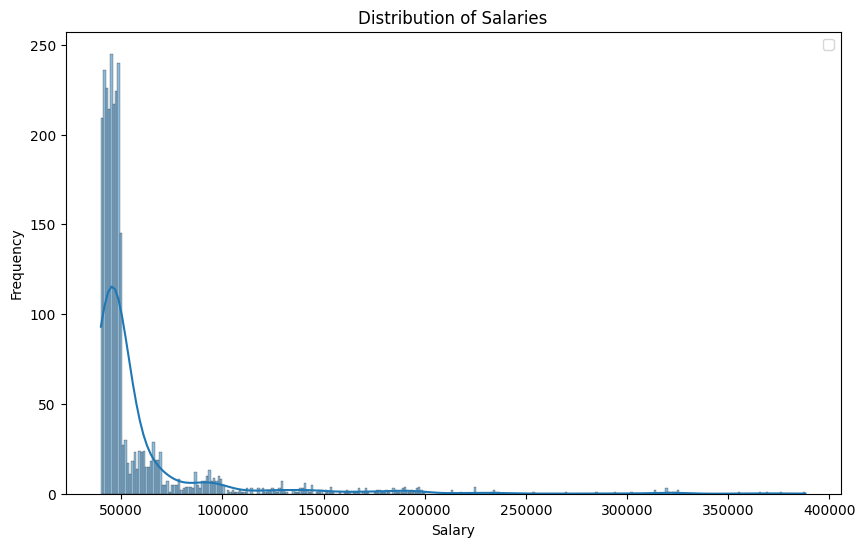

In [12]:
# Visualize the distribution of the target variable 'SALARY'
plt.figure(figsize=(10, 6))
sns.histplot(data['SALARY'], kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

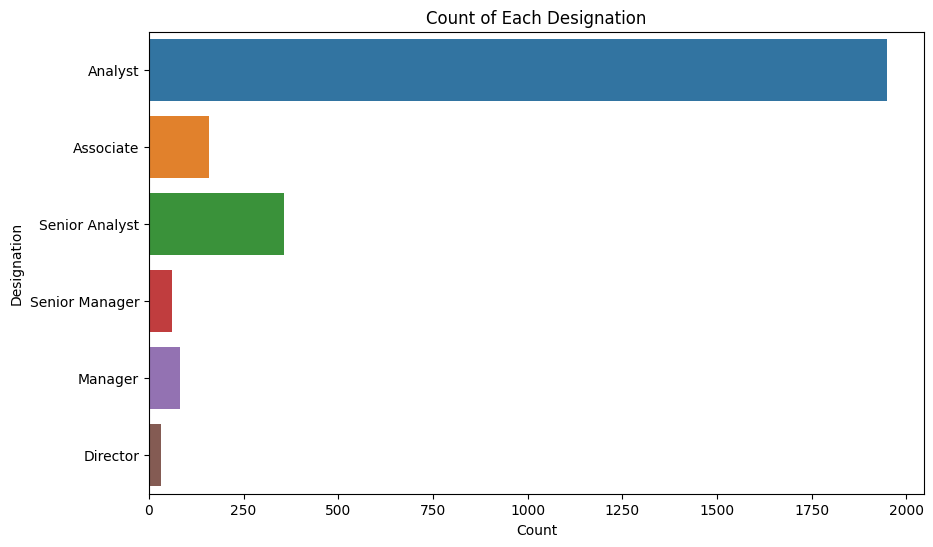

In [13]:
# Visualize the count of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(y=data['DESIGNATION'])
plt.title('Count of Each Designation')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()

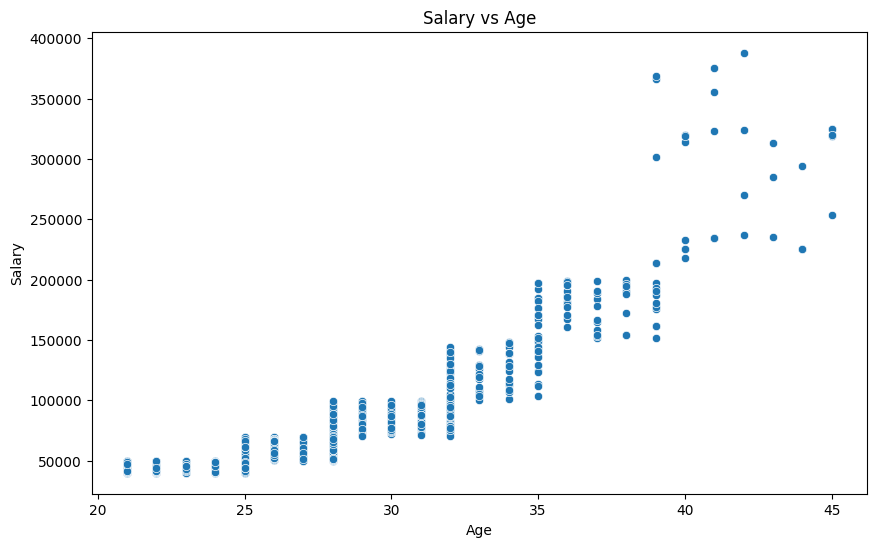

In [14]:
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['AGE'], y=data['SALARY'])
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

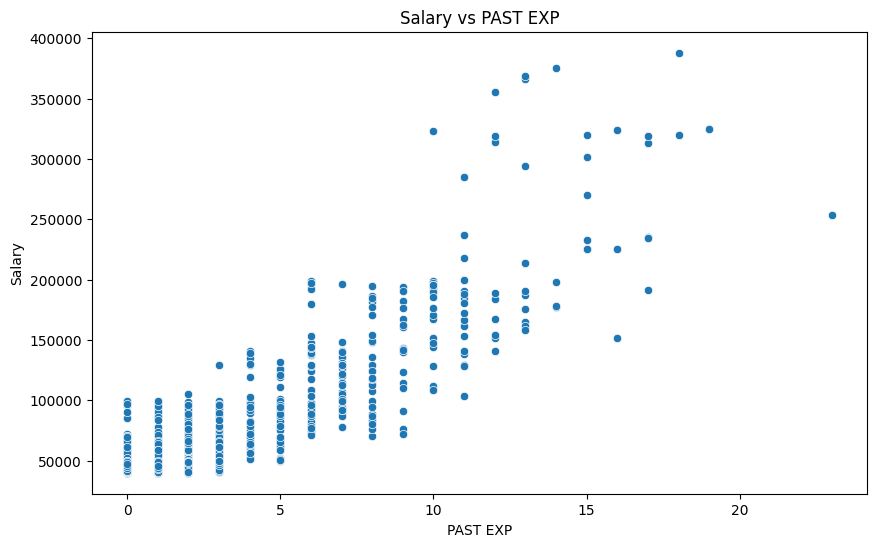

In [15]:
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PAST EXP'], y=data['SALARY'])
plt.title('Salary vs PAST EXP')
plt.xlabel('PAST EXP')
plt.ylabel('Salary')
plt.show()

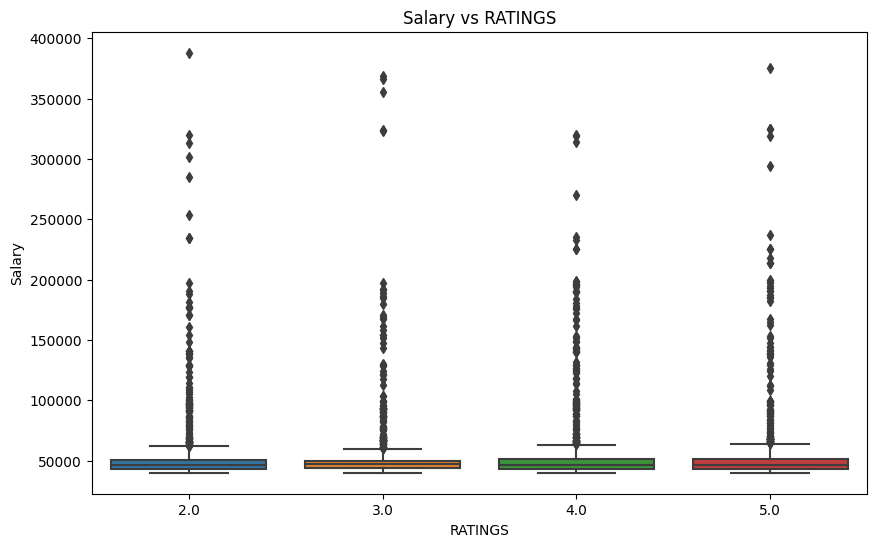

In [16]:
selected_features = ['AGE', 'PAST EXP', 'RATINGS', 'SALARY']
# Visualize the relationship between numerical features and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['RATINGS'], y=data['SALARY'])
plt.title('Salary vs RATINGS')
plt.xlabel('RATINGS')
plt.ylabel('Salary')
plt.show()

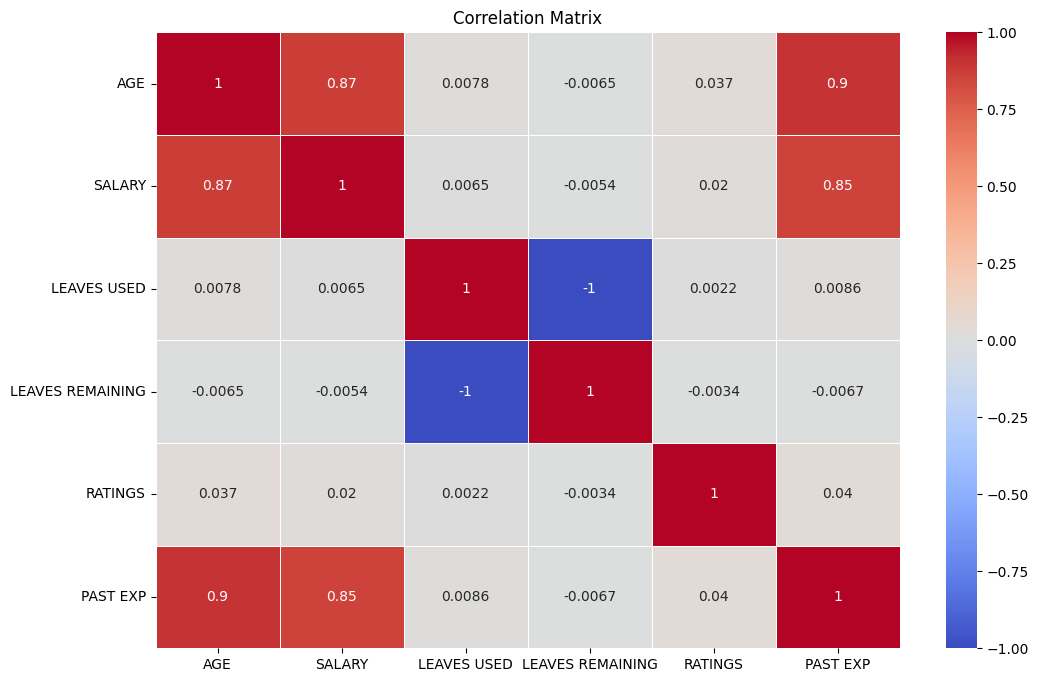

In [17]:
# Correlation heatmap
numarical_data = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
correlation_matrix = data[numarical_data].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

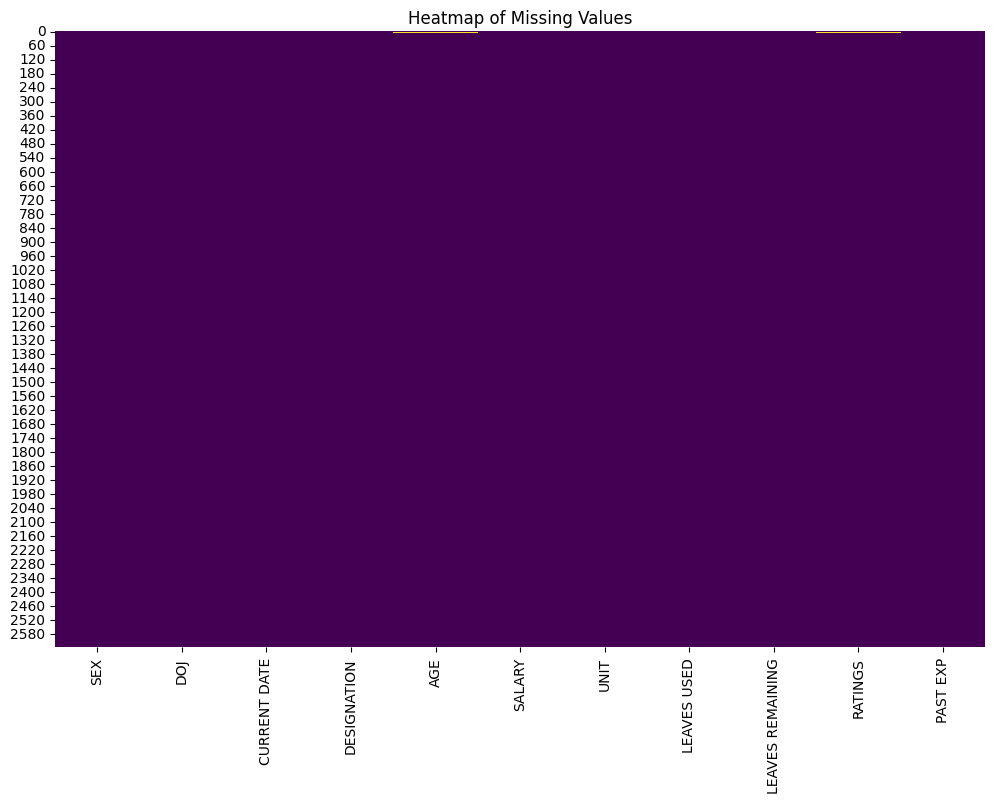

In [18]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

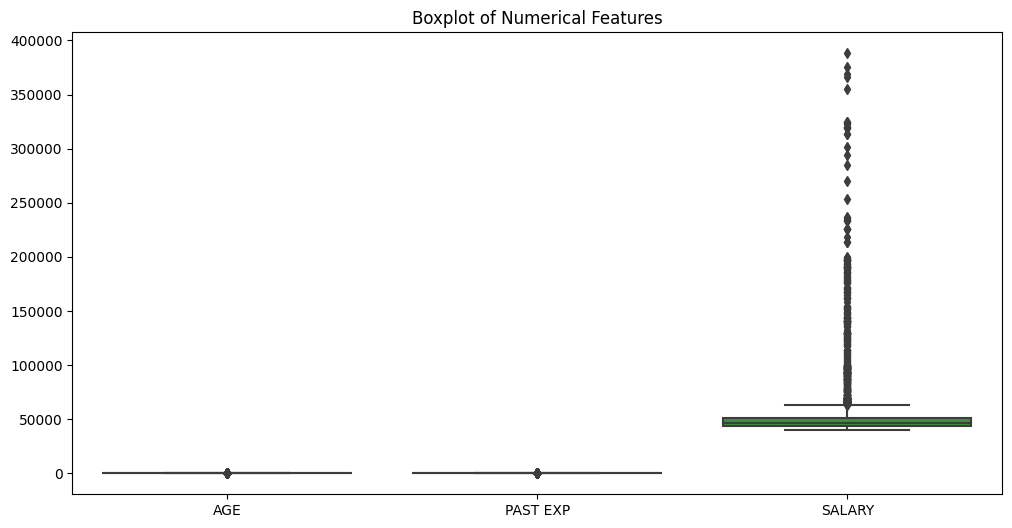

In [19]:
# Boxplot for numerical features to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['AGE', 'PAST EXP', 'SALARY']])
plt.title('Boxplot of Numerical Features')
plt.show()

In [20]:
data

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...
2634,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


### Cleaning Data

In [21]:
# Step: Clean Data
cleaning_data = CleaningData(df=data)
cleaned_df = cleaning_data.remove_duplicates()
cleaned_df = cleaning_data.replace_missing_values(column='DOJ', strategy='mode')
cleaned_df = cleaning_data.replace_missing_values(column='AGE', strategy='median')
cleaned_df = cleaning_data.replace_missing_values(column='LEAVES USED', strategy='mean')
cleaned_df = cleaning_data.replace_missing_values(column='RATINGS', strategy='median')
cleaned_df = cleaning_data.replace_missing_values(column='LEAVES REMAINING', strategy='median')

In [22]:
cleaned_df

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.000000,6.0,2.0,0
1,F,10-19-2013,01-07-2016,Associate,24.0,89207,Web,22.493737,13.0,3.0,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.000000,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.000000,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,24.0,43161,Operations,27.000000,3.0,3.0,3
...,...,...,...,...,...,...,...,...,...,...,...
2634,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.000000,15.0,5.0,10
2635,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.000000,13.0,2.0,0
2636,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.000000,1.0,5.0,0
2637,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.000000,7.0,3.0,1


In [23]:
# Check Number Nulls in each columns 
print("Check Number Nulls in each columns")
cleaned_df.isnull().sum()

Check Number Nulls in each columns


SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

### Preprocess 

In [24]:
# Step 3: Preprocess Data
preprocessor = PreprocessData(df=cleaned_df)
preprocessor_df = preprocessor.one_hot_encode(columns=['SEX', 'DESIGNATION', 'UNIT'])
preprocessor_df = preprocessor.calculate_jo_years('DOJ', 'CURRENT DATE')
preprocessor_df['total_exp'] = np.log2(preprocessor_df['PAST EXP'] + preprocessor_df['jo_Years'])
preprocessor_df = preprocessor.scaling()
preprocessor_df.dropna(inplace=True)

In [25]:
preprocessor_df

,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,SEX_F,SEX_M,...,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web,jo_Years,total_exp
0,2014-05-18,2016-01-07,0.000000,0.013125,0.600000,0.400000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.117326,0.173340
1,2013-10-19,2016-01-07,0.125000,0.141351,0.499582,0.866667,0.333333,0.304348,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.213279,0.704530
2,2014-07-28,2016-01-07,0.000000,0.002741,0.533333,0.466667,0.333333,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.085039,0.134521
3,2013-04-03,2016-01-07,0.041667,0.015940,0.466667,0.533333,0.333333,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.303774,0.333780
4,2014-11-20,2016-01-07,0.125000,0.009078,0.800000,0.200000,0.333333,0.130435,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.032742,0.457566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,2012-04-19,2016-01-07,0.208333,0.035115,0.733333,0.266667,1.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.462483,0.425177
2474,2013-04-19,2016-01-07,0.000000,0.002812,0.133333,0.866667,0.333333,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.296498,0.328862
2475,2014-05-05,2016-01-07,0.000000,0.015323,0.333333,0.666667,0.333333,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.123238,0.179946
2476,2014-11-02,2016-01-07,0.041667,0.004573,0.266667,0.733333,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.040928,0.072066


In [26]:
print(f"Name columns after encoding: {preprocessor_df.columns}")

Name columns after encoding: Index(['DOJ', 'CURRENT DATE', 'AGE', 'SALARY', 'LEAVES USED',
       'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'SEX_F', 'SEX_M',
       'DESIGNATION_Analyst', 'DESIGNATION_Associate', 'DESIGNATION_Director',
       'DESIGNATION_Manager', 'DESIGNATION_Senior Analyst',
       'DESIGNATION_Senior Manager', 'UNIT_Finance', 'UNIT_IT',
       'UNIT_Management', 'UNIT_Marketing', 'UNIT_Operations', 'UNIT_Web',
       'jo_Years', 'total_exp'],
      dtype='object')


In [27]:
# Define the columns to drop
columns_to_drop = ['DOJ', 'CURRENT DATE']

# Drop the specified columns, ensuring they exist in the DataFrame
preprocessor_df = preprocessor_df.drop(columns=[col for col in columns_to_drop if col in preprocessor_df.columns])

### Split Data

- **'X_train'**: The training set features
- **'X_test'**: The test set features
- **'y_train'**: The training set target variable
- **'y_test'**: The test set target variable

The data is split into training and test sets to evaluate the model's performance on unseen data, ensuring that the model generalizes well and avoids overfitting.

In [28]:
# Split Data
split = SplitData()
X_train, X_test, y_train, y_test = split.split(df=preprocessor_df, target='SALARY', test_size=0.2, random_state=42)

## Model and Training
#### Algorithm
- **SVR (Support Vector Regression)**
- **LR (Linear Regression)**
- **RFR (Random Forest Regression)**

#### Tuning
- pass

In [29]:
# # Hyperparameter Tuning
# hyper_tuner = TuningHyperparameters()
# best_params_svr = hyper_tuner.tune_svr(X_train, y_train)
# best_params_lr = hyper_tuner.tune_linear_regression(X_train, y_train)
# best_params_rf = hyper_tuner.tune_random_forest_regression(X_train, y_train)

In [67]:
# Train Models
model = MLModel()
svr_model = model.train_model(X_train, y_train, algorithm='svr', tune=False)
lr_model = model.train_model(X_train, y_train, algorithm='linear_regression', tune=False)
rf_model = model.train_model(X_train, y_train, algorithm='random_forest_regression',  tune=False)

In [68]:
# Save Model
model.save_model(svr_model, "svr_model.joblib")
model.save_model(lr_model, "lr_model.joblib")
model.save_model(rf_model, "rf_model.joblib")

## Predaction

In [78]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib

degree = 2

def non_linear_transform(X, degree):
    return np.power(X, degree)

# Transform the training data for non-linear regression
X_train_nlr = non_linear_transform(X_train, degree)
X_test_nlr = non_linear_transform(X_test, degree)

svr = SVR()
svr.fit(X_train, y_train)
joblib.dump(svr, 'svr_model.joblib')

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
joblib.dump(linear_regression, 'lr_model.joblib')

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
joblib.dump(random_forest, 'rf_model.joblib')

non_linear_regression = LinearRegression()
non_linear_regression.fit(X_train_nlr, y_train)
joblib.dump(non_linear_regression, 'nlr_model.joblib')


['nlr_model.joblib']

In [79]:
p_svr = SVR()
p_svr.fit(X_train_nlr, y_train)
joblib.dump(p_svr, 'p_svr_model.joblib')

['p_svr_model.joblib']

In [80]:
# Load models
svr = joblib.load('/kaggle/working/svr_model.joblib')
lr = joblib.load('/kaggle/working/lr_model.joblib')
rf = joblib.load('/kaggle/working/rf_model.joblib')
nlr = joblib.load('/kaggle/working/nlr_model.joblib')
p_svr = joblib.load('/kaggle/working/p_svr_model.joblib')

# Make predictions
predictions_svr = svr.predict(X_test)
predictions_lr = lr.predict(X_test)
predictions_rf = rf.predict(X_test)
predictions_nlr = nlr.predict(X_test_nlr)
predictions_p_svr = p_svr.predict(X_test_nlr)

# # Display predictions
# print("SVR Predictions:", predictions_svr)
# print("Linear Regression Predictions:", predictions_lr)
# print("Random Forest Predictions:", predictions_rf)
# print("Non-linear Regression Predictions:", predictions_nlr)


## Evaluation
- **'R2'**: 
- **'MAE'**:
- **'MdAE'**:
- **'MSE'**:

In [82]:
# Evaluate SVR
evaluator = Evaluation(y_test, predictions_svr)
svr_r2 = evaluator.r2()
svr_mae = evaluator.MAE()
svr_mdae = evaluator.MdAE()
svr_mse = evaluator.MSE()

# Evaluate LR
evaluator = Evaluation(y_test, prediction_lr)
lr_r2 = evaluator.r2()
lr_mae = evaluator.MAE()
lr_mdae = evaluator.MdAE()
lr_mse = evaluator.MSE()

# Evaluate RF
evaluator = Evaluation(y_test, predictions_rf)
rf_r2 = evaluator.r2()
rf_mae = evaluator.MAE()
rf_mdae = evaluator.MdAE()
rf_mse = evaluator.MSE()


evaluator = Evaluation(y_test, predictions_nlr)
nlr_r2 = evaluator.r2()
nlr_mae = evaluator.MAE()
nlr_mdae = evaluator.MdAE()
nlr_mse = evaluator.MSE()

evaluator = Evaluation(y_test, predictions_p_svr)
p_svr_r2 = evaluator.r2()
p_svr_mae = evaluator.MAE()
p_svr_mdae = evaluator.MdAE()
p_svr_mse = evaluator.MSE()


print(f"SVR Model - R2: {svr_r2}, MAE: {svr_mae}, MdAE: {svr_mdae}, MSE: {svr_mse}")
print(f"Linear Regression Model - R2: {lr_r2}, MAE: {lr_mae}, MdAE: {lr_mdae}, MSE: {lr_mse}")
print(f"Random Forest Model - R2: {rf_r2}, MAE: {rf_mae}, MdAE: {rf_mdae}, MSE: {rf_mse}")
print(f"non Linear Regression Model - R2: {nlr_r2}, MAE: {nlr_mae}, MdAE: {nlr_mdae}, MSE: {nlr_mse}")
print(f"non Linear SVR Model - R2: {p_svr_r2}, MAE: {p_svr_mae}, MdAE: {p_svr_mdae}, MSE: {p_svr_mse}")

SVR Model - R2: 0.6369024968609043, MAE: 0.04310559285852635, MdAE: 0.03601214948405601, MSE: 0.0029024397698888594
Linear Regression Model - R2: -0.11037911734240757, MAE: 0.04009864186727169, MdAE: 0.010622019030328441, MSE: 0.00887587626454731
Random Forest Model - R2: 0.9192110813805627, MAE: 0.01382089268986214, MdAE: 0.00874637687404304, MSE: 0.0006457906439459664
non Linear Regression Model - R2: 0.931198057902052, MAE: 0.014893825812597912, MdAE: 0.009377520968646634, MSE: 0.0005499720908688706
non Linear SVR Model - R2: 0.6294756360573319, MAE: 0.045027098025969305, MdAE: 0.042088452137717475, MSE: 0.0029618067883215348


In [83]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

lgb_regressor = lgb.LGBMRegressor()
lgb_regressor.fit(X_train, y_train)
joblib.dump(lgb_regressor, 'lgb_model.joblib')

xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
joblib.dump(xgb_regressor, 'xgb_model.joblib')

cb_regressor = cb.CatBoostRegressor(silent=True)
cb_regressor.fit(X_train, y_train)
joblib.dump(cb_regressor, 'cb_model.joblib')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 617
[LightGBM] [Info] Number of data points in the train set: 1866, number of used features: 20
[LightGBM] [Info] Start training from score 0.052146


['cb_model.joblib']

In [84]:
# Load models
lgb_model = joblib.load('/kaggle/working/lgb_model.joblib')
xgb_model = joblib.load('/kaggle/working/xgb_model.joblib')
cb_model = joblib.load('/kaggle/working/cb_model.joblib')

# Make predictions
predictions_lgb = lgb_model.predict(X_test)
predictions_xgb = xgb_model.predict(X_test)
predictions_cb = cb_model.predict(X_test)

# Evaluate the models
r2_lgb = r2_score(y_test, predictions_lgb)
mae_lgb = mean_absolute_error(y_test, predictions_lgb)
mdae_lgb = median_absolute_error(y_test, predictions_lgb)
mse_lgb = mean_squared_error(y_test, predictions_lgb)

r2_xgb = r2_score(y_test, predictions_xgb)
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
mdae_xgb = median_absolute_error(y_test, predictions_xgb)
mse_xgb = mean_squared_error(y_test, predictions_xgb)

r2_cb = r2_score(y_test, predictions_cb)
mae_cb = mean_absolute_error(y_test, predictions_cb)
mdae_cb = median_absolute_error(y_test, predictions_cb)
mse_cb = mean_squared_error(y_test, predictions_cb)

# Display results
print("LightGBM Model - R2:", r2_lgb, "MAE:", mae_lgb, "MdAE:", mdae_lgb, "MSE:", mse_lgb)
print("XGBoost Model - R2:", r2_xgb, "MAE:", mae_xgb, "MdAE:", mdae_xgb, "MSE:", mse_xgb)
print("CatBoost Model - R2:", r2_cb, "MAE:", mae_cb, "MdAE:", mdae_cb, "MSE:", mse_cb)


LightGBM Model - R2: 0.9142939634215398 MAE: 0.014333522395785146 MdAE: 0.009302023825421824 MSE: 0.0006850958955495167
XGBoost Model - R2: 0.9327000890167221 MAE: 0.01385128489153654 MdAE: 0.008963157469223326 MSE: 0.0005379655229218611
CatBoost Model - R2: 0.9389418432742781 MAE: 0.013299328004675575 MdAE: 0.008668915445228527 MSE: 0.0004880717185459508
